In [ ]:
import os
os.environ['KAGGLE_USERNAME'] ="sub1994bharati"
os.environ['KAGGLE_KEY'] = "8fe6453b143703fb43ee97105848efe1"


In [ ]:
!kaggle datasets download tawsifurrahman/covid19-radiography-database

covid19-radiography-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzipping the data

!unzip "/content/covid19-radiography-database.zip"

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image


In [ ]:
covid_imgs = pd.read_excel("/content/COVID-19_Radiography_Dataset/COVID.metadata.xlsx")
covid_imgs.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [ ]:
opacity_images = pd.read_excel("/content/COVID-19_Radiography_Dataset/Lung_Opacity.metadata.xlsx")
opacity_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Lung_Opacity-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,Lung_Opacity-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
normal_images = pd.read_excel("/content/COVID-19_Radiography_Dataset/Normal.metadata.xlsx")
normal_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,NORMAL-1,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...
1,NORMAL-2,PNG,256*256,https://www.kaggle.com/c/rsna-pneumonia-detect...


In [ ]:
pneumonia_images = pd.read_excel("/content/COVID-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx")
pneumonia_images.head(2)

,FILE NAME,FORMAT,SIZE,URL
0,Viral Pneumonia-1,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...
1,Viral Pneumonia-2,PNG,256*256,https://www.kaggle.com/paultimothymooney/chest...


In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/'))

2

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/COVID/images'))

3616

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/Normal/images'))

10192

In [ ]:
len(os.listdir('COVID-19_Radiography_Dataset/Lung_Opacity/images'))

6012

In [ ]:
import cv2

In [ ]:
img = cv2.imread('COVID-19_Radiography_Dataset/Normal/images/Normal-1.png')

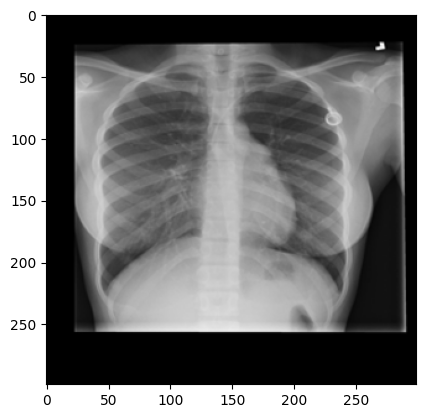

In [ ]:
plt.imshow(img)

In [ ]:
img = cv2.imread('/content/COVID-19_Radiography_Dataset/COVID/images/COVID-1.png')

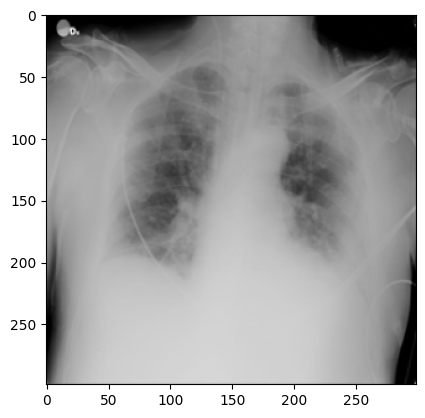

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(299, 299, 3)

In [ ]:
def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (25, 25))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [ ]:
covid_path = "COVID-19_Radiography_Dataset/COVID/images"
covidUrl = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [ ]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [ ]:
covidImages.shape

(3616, 25, 25, 3)

In [ ]:
Normal_path = "COVID-19_Radiography_Dataset/Normal/images"
NormalUrl = os.listdir(Normal_path)
NormalImages, NormalTargets = loadImages(Normal_path, NormalUrl, 1)

In [ ]:
len(NormalUrl), len(NormalImages)

(10192, 10192)

In [ ]:
NormalImages.shape

(10192, 25, 25, 3)

In [ ]:
Lung_Opacity_path = "COVID-19_Radiography_Dataset/Lung_Opacity/images"
Lung_OpacityUrl = os.listdir(Lung_Opacity_path)
Lung_OpacityImages, Lung_OpacityTargets = loadImages(Lung_Opacity_path, Lung_OpacityUrl, 1)


In [ ]:
len(Lung_OpacityUrl), len(Lung_OpacityImages)

(6012, 6012)

In [ ]:
ViralPneumonia_path = "COVID-19_Radiography_Dataset/Viral Pneumonia/images"
ViralPneumoniaUrl = os.listdir(ViralPneumonia_path)
ViralPneumoniaImages, ViralPneumoniaTargets = loadImages(ViralPneumonia_path, ViralPneumoniaUrl, 1)

In [ ]:
len(ViralPneumoniaUrl), len(ViralPneumoniaImages)

(1345, 1345)

In [ ]:
ViralPneumoniaImages.shape

(1345, 25, 25, 3)

In [ ]:
covidImages = np.asarray(covidImages)
NormalImages = np.asarray(NormalImages)


In [ ]:
data = np.r_[covidImages, NormalImages]

In [ ]:
data.shape

(13808, 25, 25, 3)

In [ ]:
targets = np.r_[covidTargets, NormalTargets]

In [ ]:
targets.shape

(13808,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.25)

In [ ]:
model = Sequential([
    Conv2D(32, 3, input_shape=(25,25,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 16)          2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 16)          0

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
324/324 [==============================] - 9s 9ms/step - loss: 0.0171 - accuracy: 0.9969 - val_loss: 1.8499e-11 - val_accuracy: 1.0000
Epoch 2/5
324/324 [==============================] - 2s 6ms/step - loss: 6.4372e-10 - accuracy: 1.0000 - val_loss: 1.8481e-11 - val_accuracy: 1.0000
Epoch 3/5
324/324 [==============================] - 2s 6ms/step - loss: 6.4322e-10 - accuracy: 1.0000 - val_loss: 1.8459e-11 - val_accuracy: 1.0000
Epoch 4/5
324/324 [==============================] - 2s 6ms/step - loss: 6.4268e-10 - accuracy: 1.0000 - val_loss: 1.8429e-11 - val_accuracy: 1.0000
Epoch 5/5
324/324 [==============================] - 2s 7ms/step - loss: 6.4194e-10 - accuracy: 1.0000 - val_loss: 1.8395e-11 - val_accuracy: 1.0000


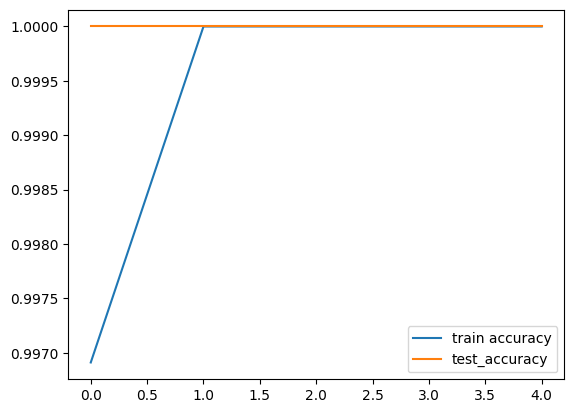

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

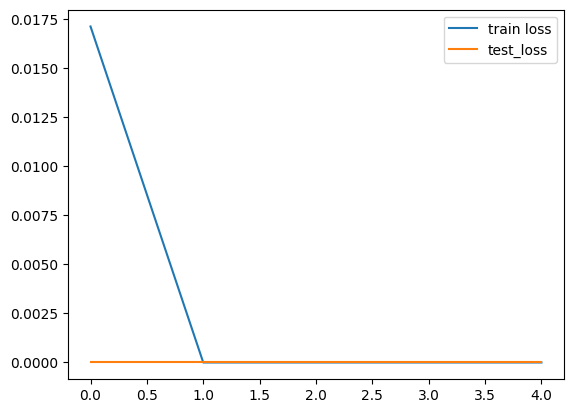

In [ ]:
plt.plot(model.history.history['loss'], label = 'train loss')
plt.plot(model.history.history['val_loss'],label = 'test_loss')
plt.legend()
plt.show()